In [1]:
import torch
import matplotlib.pyplot as plt
from torch import optim, distributions, nn
import torch.nn.utils as nn_utils
from tqdm.autonotebook import tqdm
from gpzoo.gp import SVGP, VNNGP
from gpzoo.kernels import NSF_RBF, RBF
from gpzoo.likelihoods import NSF2
from gpzoo.utilities import rescale_spatial_coords, dims_autocorr, regularized_nmf, add_jitter, scanpy_sizefactors #init_softplus
import gpzoo.pri_experiment_utilities as exp
import squidpy as sq
import numpy as np
import time
import random
import scanpy as sc
import anndata as ad
from anndata import AnnData
from squidpy.gr import spatial_neighbors, spatial_autocorr
from sklearn.cluster import KMeans
from os import path

/tmp/ipykernel_1000610/1396055672.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
!pwd
root_path = '/engelhardt/home/pshrestha/vnngp/'
torch.manual_seed(256)

/engelhardt/home/pshrestha/vnngp/GPzoo/notebooks


In [3]:
print("CUDA available: ", torch.cuda.is_available())
print("Number of GPUs: ", torch.cuda.device_count())
print("Current GPU: ", torch.cuda.current_device())
print("GPU Name: ", torch.cuda.get_device_name(torch.cuda.current_device()))

CUDA available:  True
Number of GPUs:  2
Current GPU:  0
GPU Name:  NVIDIA A30


In [4]:
L = [5, 10, 15]

In [5]:
X, Y = exp.load_visium()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:58<00:00, 102.68it/s]
/engelhardt/home/pshrestha/vnngp/GPzoo/gpzoo/pri_experiment_utilities.py:589: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.savefig(f'{save_path}/{file_path}_plot.png')
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:59<00:00, 101.64it/s]
/engelhardt/home/pshrestha/anaconda3/envs/vnngp/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  func(*args, **kwargs)


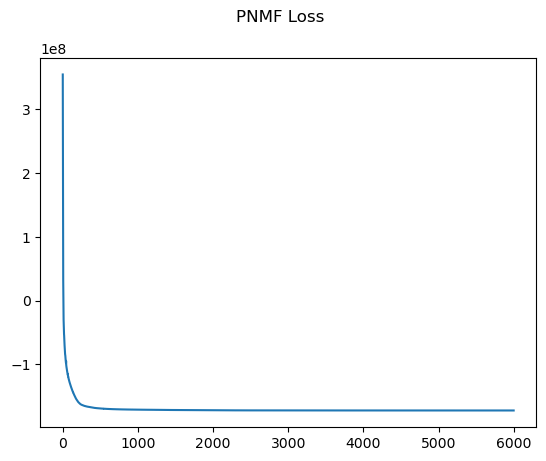

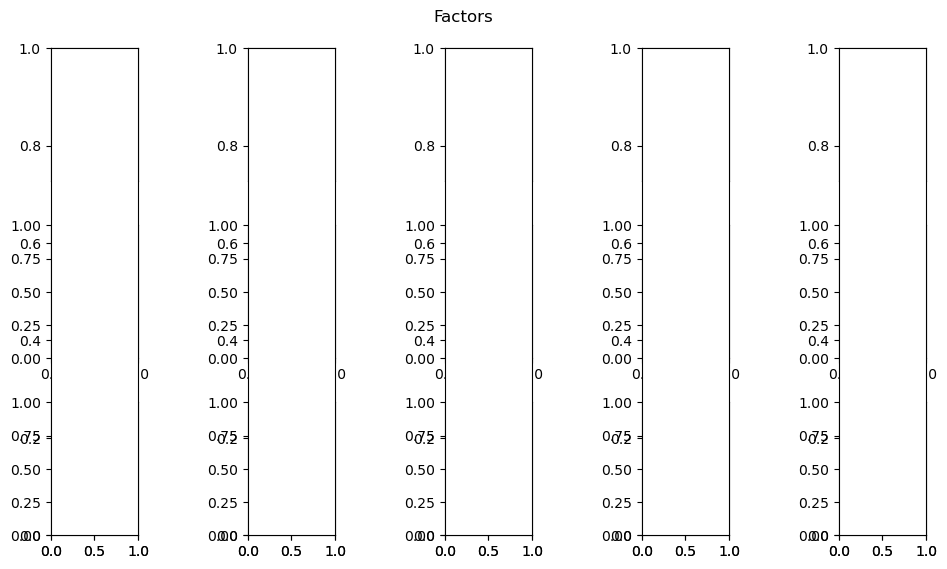

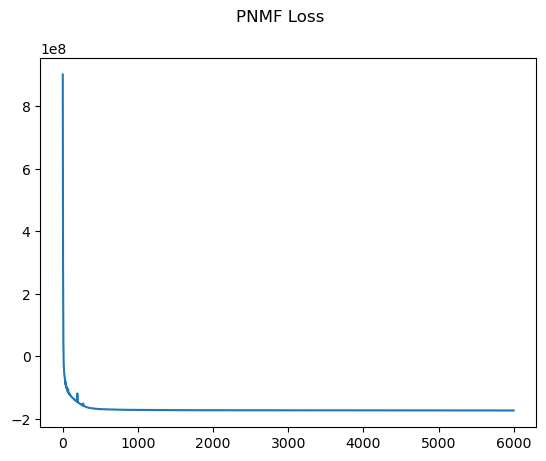

/engelhardt/home/pshrestha/anaconda3/envs/vnngp/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.canvas.print_figure(bytes_io, **kw)


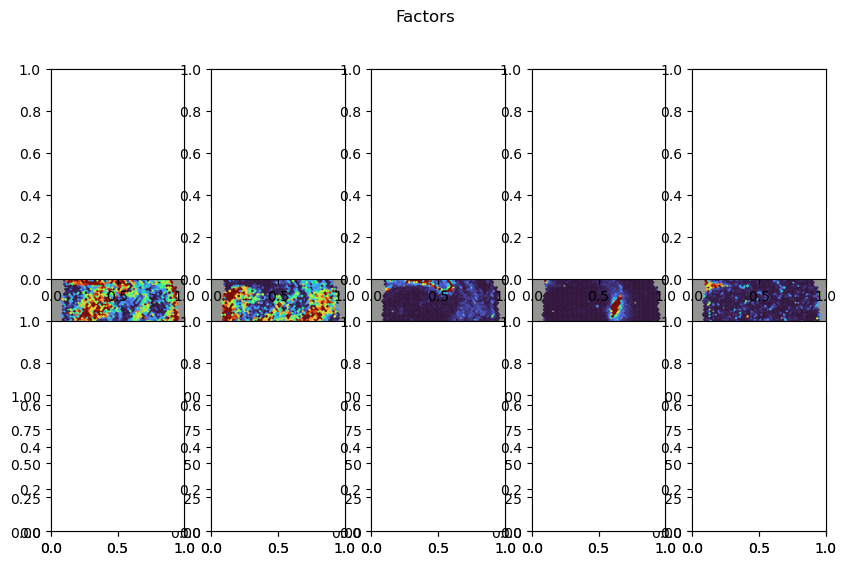

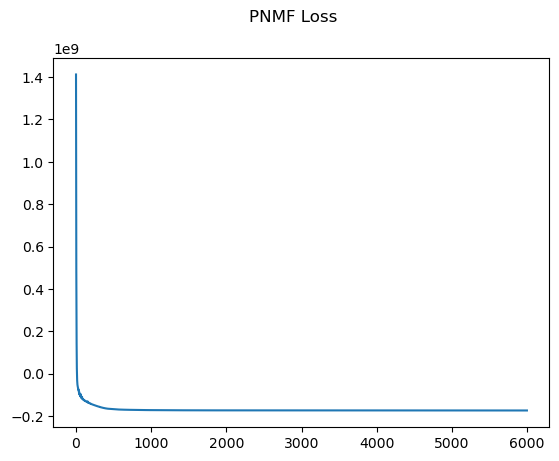

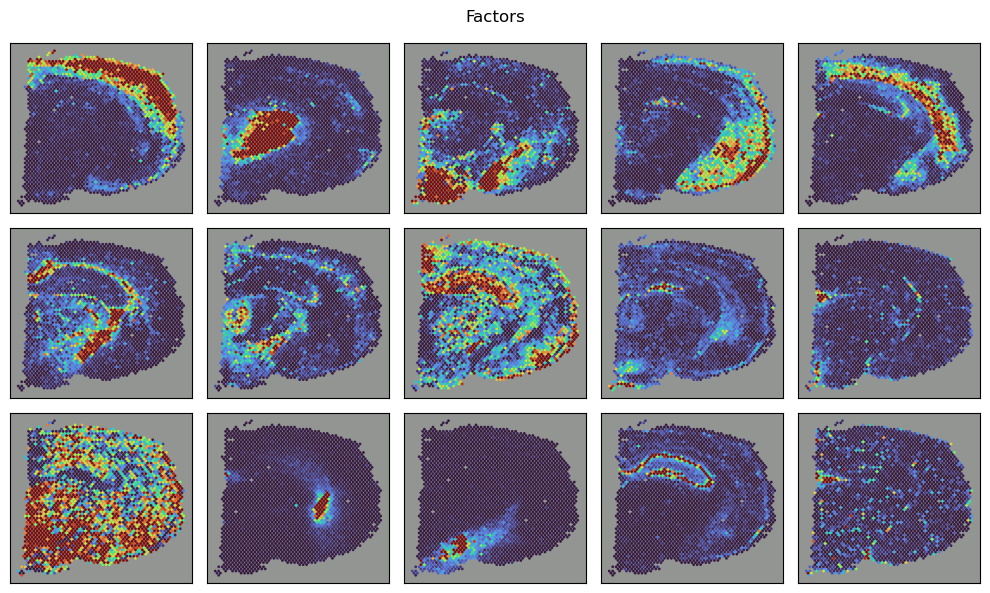

In [6]:
save_path = path.join(root_path, "results/visium/pnmf")

#outputs_dict = defaultdict(list)
for l in L:
    dicts = {'L': l, 
             'lr': 1e-1,
             'rs': 256,
                }
    exp.run_pnmf(X, Y, save_path, steps=6000, kwargs=dicts)
